In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from scipy.sparse import csr_matrix
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
A, y = load_svmlight_file("mushrooms.txt")

In [3]:
y.shape

(8124,)

In [4]:
n=100

In [5]:
for i in range(len(y)):
    if y[i]==1.0:
        y[i]=-1.0
    else:
        y[i]=1.0

In [6]:
y

array([-1.,  1.,  1., ...,  1., -1.,  1.])

In [7]:
Amax=csr_matrix.max(A, axis=0)

In [8]:
Amax

<1x112 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in COOrdinate format>

In [9]:
d=112

In [10]:
for i in range(112):
    print(A[0,i])

0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0


In [11]:
AA=csr_matrix.todense(A)

In [12]:
AA

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
AA.shape

(8124, 112)

In [14]:
A[0]

<1x112 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [15]:
xcheck=np.array([random.random() for i in range(d)])*0+1

In [16]:
row_sums=csr_matrix.dot(A,xcheck)

In [17]:
row_sums.max()

21.0

In [18]:
q=np.array([random.random() for i in range(d)])

In [19]:
AA.dot(q)

matrix([[11.8565082 , 10.4691904 , 10.53417398, ..., 12.02584082,
         11.02326415, 12.83625042]])

In [20]:
csr_matrix.dot(A,q)

array([11.8565082 , 10.4691904 , 10.53417398, ..., 12.02584082,
       11.02326415, 12.83625042])

Похоже, научился переможножать эту CSR матрицу 

In [21]:
y[0]

-1.0

In [22]:
AA[1,]

matrix([[0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
         1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [23]:
AA[1].shape

(1, 112)

## Реализация методов

In [24]:
L=[21.0*10/4/9, 21.0*100/4/99, 21.0*1000/4/999,21.0*10000/4/9999,]


In [25]:
L[0]

5.833333333333333

In [26]:
MU=[L[0]/10,L[1]/100, L[2]/1000, L[3]/10000]

In [27]:
MU[3]

0.000525052505250525

In [28]:
epsilon=0.01

In [29]:
from math import exp,log,sqrt

In [30]:
def funf(x,mu1):
    sumf=0
    Ax=csr_matrix.dot(A,x)
    for i in range(n):
#        npa=csr_matrix.toarray(csr_matrix.getrow(A,i))
#        zq=np.array([])
#        zq=npa[0,]
        f_i=(log(1+np.exp(-y[i]*Ax[i],dtype=np.float128))+mu1/2.0*LA.norm(x)**2)
        sumf=sumf+f_i
    return(sumf*1.0/n)
    

In [31]:
def grad(x, mu1):
    sumg=0

    Ax=csr_matrix.dot(A,x)
    for i in range(n):
        npa=csr_matrix.toarray(csr_matrix.getrow(A,i))
        zq=np.array([])
        zq=npa[0,]
        grad_i=(-1*y[i]*zq*np.exp(-y[i]*Ax[i], dtype=np.float128))/(1+np.exp(-y[i]*Ax[i], dtype=np.float128))+mu1*x
        sumg=sumg+grad_i
        
    return(sumg/n)
        

    
    

In [32]:
def get_a(d,x,Mu):
    a = 2.0/L[0]
    t = 0.9
    eps = 0.5
    while True:
        f1 = funf(x - a*d,Mu)
        f2 = funf(x,Mu) - eps*a*np.dot(d, d)
        if f1 < f2:
            return a
        else:
            a *= t

In [33]:
x0=np.array([random.random() for i in range(d)])*0
y0=np.array([random.random() for i in range(d)])*0

In [34]:
z=x0+3
q=x0+10

In [35]:
z*q

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30.])

### Универсальный градиентный спуск

Универсальный с подбором константы L

In [361]:
def UGD(x00,epsilon, Mu,L):
    a_1 = []
    xk = x00
    xk1=0
    fx=[]
    Lk=L
    Lk1=0
    gradfx=[]
    kN=0
    gr=0
    fk=0
    fk1=0
    d=0
    grnorm=0
    
    
    while((LA.norm(grad(xk,Mu)))>=(epsilon)):
    #for i in range(300):
        a=1.0/Lk
        gr=grad(xk,Mu)
        xk1=xk-a*gr
        fk=funf(xk,Mu)
        fk1=funf(xk1,Mu)
        d=fk+grad(xk,Mu).dot(xk1-xk)+Lk/2.0*(LA.norm(xk1-xk))**2+epsilon**3-fk1
        if (d>=0):
            #Lk=Lk/sqrt(2.0)
            Lk=Lk/2.0
            xk=xk1
        else:
            #Lk=Lk*sqrt(2.0)
            Lk=Lk*2.0
        grnorm=LA.norm(gr)**2
        gradfx.append(grnorm)
        fx.append(funf(xk,Mu))
        kN=kN+1
    
    return (kN,fx,gradfx)  
        

In [298]:
Lk=1
xk=x0
xk1=x0+1
fk=funf(xk,MU[0])
fk1=funf(xk1,MU[0])
d=fk1-fk+grad(xk,MU[0]).dot(xk1-xk)+Lk/2*LA.norm(xk1-xk)**2

In [362]:
res_UGD=[]
for i in range(4):
    res_UGD.append(UGD(x0,epsilon,MU[i],L[i]))

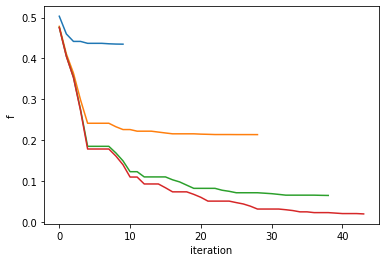

In [363]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('f')
    plt.plot(res_UGD[i][1])
plt.show()

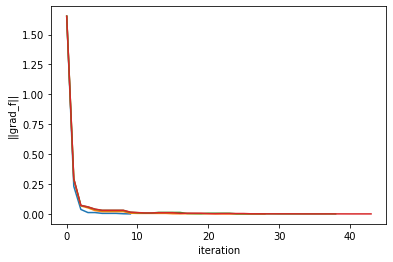

In [365]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('||grad_f||')
    plt.plot(res_UGD[i][2])
plt.show()

In [366]:
for i in range(4):
    print("Universal GD num of it:", gdb[i][0], ",mu=", MU[i])

Universal GD num of it: 13 ,mu= 0.5833333333333333
Universal GD num of it: 67 ,mu= 0.053030303030303025
Universal GD num of it: 192 ,mu= 0.005255255255255255
Universal GD num of it: 320 ,mu= 0.000525052505250525


In [303]:
def a_grad(x, mu1):
    sumg=0

    Ax=csr_matrix.dot(A,x)
    for i in range(n):
        npa=csr_matrix.toarray(csr_matrix.getrow(A,i))
        zq=np.array([])
        zq=npa[0,]
        grad_i=(-1*y[i]*zq*np.exp(-y[i]*Ax[i], dtype=np.float128))/(1+np.exp(-y[i]*Ax[i], dtype=np.float128))+mu1*x
        sumg=sumg+grad_i
        
    return(sumg/n)

In [304]:
def AGD(x00,epsilon, Mu,L):
    a_1 = []
    xk = x00
    fx=[]
    gradfx=[]
    kN=0
    gr=0
    sgr=0
    grnorm=0
    G0=np.array([random.random() for i in range(d)])*0
    a0=2.0/L
    a=np.array([random.random() for i in range(d)])*0
    
    while((LA.norm(grad(xk,Mu)))>=(epsilon)):
        
        #a=2.0/L[0]
        gr=grad(xk,Mu)
        sgr=gr**2
        G0=G0+sgr #делаем эту матрицу G, суммируя квадраты частных производных
        for i in range(d):
            a[i]=a0/(sqrt(G0[i])+0.00000001)
            
        grnorm=LA.norm(gr)**2
        gradfx.append(grnorm)
        fx.append(funf(xk,Mu))
        xk1=xk-a*gr
        xk=xk1
        kN=kN+1
    
    return (kN,fx,gradfx) 
   # return fx

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [93]:
agd=[]
for i in range(4):
    agd.append(AGD(x0,epsilon,MU[i],L[i]))

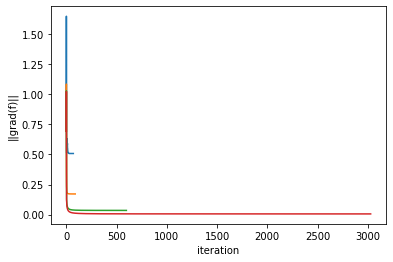

In [115]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('||grad(f)||')
    plt.plot(agd[i][1])
plt.show()

In [113]:
for i in range(4):
    print("Adaptive GD num of it:", agd[i][0], ",mu=", MU[i])

Adaptive GD num of it: 71 ,mu= 0.5833333333333333
Adaptive GD num of it: 90 ,mu= 0.053030303030303025
Adaptive GD num of it: 599 ,mu= 0.005255255255255255
Adaptive GD num of it: 3030 ,mu= 0.000525052505250525


In [69]:
# обычный ГрадСпуск с Армихо - получается медленее адаптивного

In [306]:
def GD(x00,epsilon, Mu):
    a_1 = []
    xk = x00
    fx=[]
    gradfx=[]
    kN=0
    gr=0
    grnorm=0
    while((LA.norm(grad(xk,Mu)))>=(epsilon)):
        a = get_a(grad(xk,Mu),xk,Mu)
        #a=2.0/L[0]
        gr=grad(xk,Mu)
        grnorm=LA.norm(gr)**2
        gradfx.append(grnorm)
        fx.append(funf(xk,Mu))
        xk1=xk-a*gr
        xk=xk1
        kN=kN+1
    
    return (kN,fx,gradfx)  
        
        
        
        

In [307]:
gd_data=GD(x0,epsilon, MU[0])

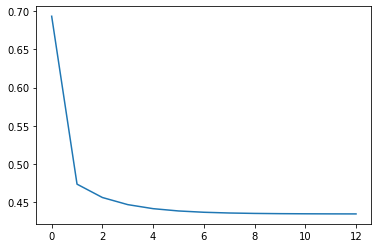

In [308]:
plt.plot(gd_data[1])

In [309]:
gdb=[]
for i in range(4):
    gdb.append(GD(x0,epsilon,MU[i]))

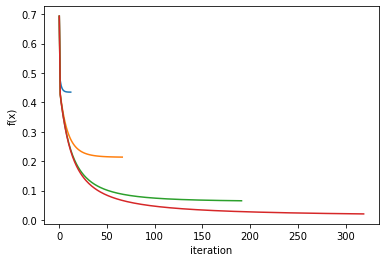

In [310]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.plot(gdb[i][1])
plt.show()

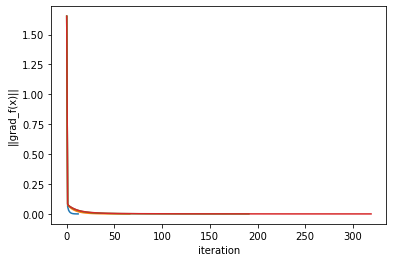

In [311]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('||grad_f(x)||')
    plt.plot(gdb[i][2])
plt.show()

In [312]:
get_a(grad(x0, MU[0]),x0,MU[0])

0.2499428571428572

In [313]:
for i in range(4):
    print("GD num of it:", gdb[i][0], ",mu=", MU[i])

GD num of it: 13 ,mu= 0.5833333333333333
GD num of it: 67 ,mu= 0.053030303030303025
GD num of it: 192 ,mu= 0.005255255255255255
GD num of it: 320 ,mu= 0.000525052505250525


### Ускоренный (оптимальный) метод Нестерова

In [314]:
def Nest(x00,y00,kappa,epsilon,Mu):
    yk=y00
    xk=x00
    kN=0
    k=1
    grnorm=0
    #fx=np.array([])
    #gradfx=np.array([])
    fx=[]
    gradfx=[]
    a=kappa**2*Mu
    while((LA.norm(grad(xk,Mu))))>=(epsilon):
        fx.append(funf(xk,Mu))
        grnorm=LA.norm(grad(xk,Mu))**2
        gradfx.append(grnorm)
        xk1=yk-1/a*grad(xk,Mu)
        yk1=xk1+(sqrt(kappa)-1)/(sqrt(kappa)+1)*(xk1-xk)
        xk=xk1
        yk=yk1
        kN=kN+1
        k=k+1
        
    return (kN,fx,gradfx,xk)

In [315]:
gr=grad(x0,1)

In [316]:
sqrt(L[0]/MU[0])

3.1622776601683795

In [317]:
b=[]
for i in range(4):
    kappa=sqrt(L[i]/MU[i])
    b.append(Nest(x0,y0,kappa,epsilon,MU[i]))
    

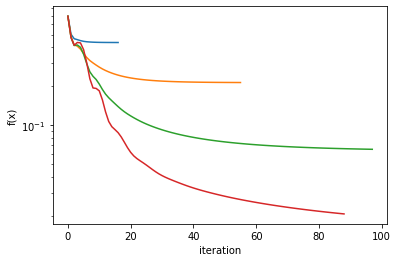

In [318]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.plot(b[i][1])
plt.show()


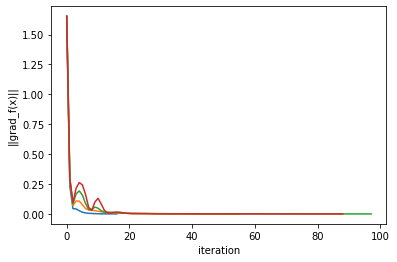

In [319]:
for i in range(4):
    plt.plot(b[i][2])
    plt.xlabel('iteration')
    plt.ylabel('||grad_f(x)||')
plt.show()

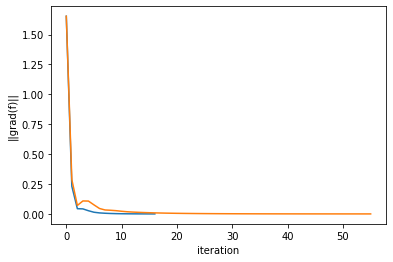

In [320]:
for i in range(2):
    plt.plot(b[i][2])
    plt.xlabel('iteration')
    plt.ylabel('||grad(f)||')
    
plt.show()

In [321]:
for i in range(4):
    print("Nesterov num of it:", b[i][0], ",mu=", MU[i])

Nesterov num of it: 17 ,mu= 0.5833333333333333
Nesterov num of it: 56 ,mu= 0.053030303030303025
Nesterov num of it: 98 ,mu= 0.005255255255255255
Nesterov num of it: 89 ,mu= 0.000525052505250525


### Стохастический градиентный спуск

In [44]:
def grad_sgd(x, mu1):
    sumg=0
    Ax=csr_matrix.dot(A,x)
    nit=3000
    for j in range(nit):
        i=int(8123*np.random.rand())
        j=i
        npa=csr_matrix.toarray(csr_matrix.getrow(A,j))
        zq=np.array([])
        zq=npa[0,]
        grad_i=(-1*y[i]*zq*np.exp(-y[i]*Ax[i], dtype=np.float128))/(1+np.exp(-y[i]*Ax[i], dtype=np.float128))+mu1*x
        sumg=sumg+grad_i
        
    return(sumg/nit)
        


In [48]:
def SGD0(x00,epsilon, Mu,L,i):
    a_1 = []
    xk = x00
    fx=[]
    gradfx=[]
    kN=0
    gr=0
    grnorm=0
 
    #while((LA.norm(grad_sgd(xk,Mu)))>=(epsilon*10)):
    for j in range(i*100):
        #i=int(8123*np.random.rand())
        #a = get_a(grad(xk,Mu),xk,Mu)
        #a=2.0/L[0]*np.random.rand()
        #a=1.0/L/(kN+1)
        a=2.0/(Mu*kN+2*L)
        #a=1.0/L
        gr=grad_sgd(xk,Mu)
        grnorm=LA.norm(gr)**2
        gradfx.append(grnorm)
        fx.append(funf(xk,Mu))
        xk1=xk-a*gr
        xk=xk1
        kN=kN+1
    
    return (kN,fx,gradfx,xk)  

In [49]:
sgd_data0=[]
for i in range(4):
    sgd_data0.append(SGD0(x0,epsilon,MU[i],L[i],i+1))
    # , ЧТО ЕМУ НЕ НРАВИТСЯ, ПОЧЕМУ ЗАВИСАЕТ

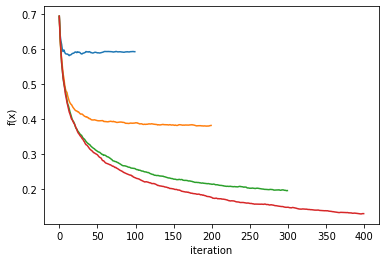

In [50]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.plot(sgd_data0[i][1])
plt.show()

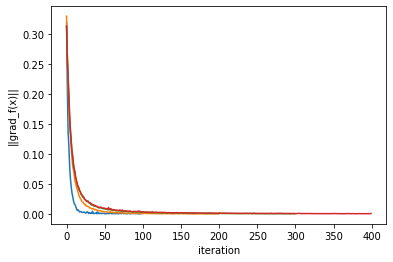

In [51]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('||grad_f(x)||')
    plt.plot(sgd_data0[i][2])
plt.show()

In [52]:
def SGD(x00,epsilon, Mu,L):
    a_1 = []
    xk = x00
    fx=[]
    gradfx=[]
    kN=0
    gr=0
    grnorm=0
    while((LA.norm(grad(xk,Mu)))>=(epsilon)):
        #a = get_a(grad(xk,Mu),xk,Mu)
        #a=2.0/L[0]*np.random.rand()
        a=2.0/L
        gr=grad(xk,Mu)*(0.8+np.random.rand()*0.4)
        grnorm=LA.norm(gr)**2
        gradfx.append(grnorm)
        fx.append(funf(xk,Mu))
        xk1=xk-a*gr
        xk=xk1
        kN=kN+1
    
    return (kN,fx,gradfx)  

In [53]:
#sgd_data1=[]
#for i in range(1):
#    sgd_data1.append(SGD(x0,epsilon,MU[i],L[i]))

In [54]:
sgd_data=[]
for i in range(4):
    sgd_data.append(SGD(x0,epsilon,MU[i],L[i]))

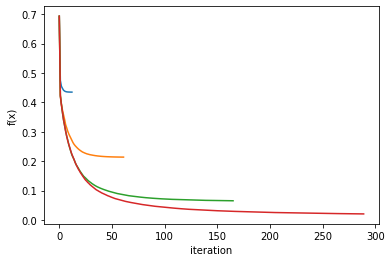

In [55]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.plot(sgd_data[i][1])
plt.show()

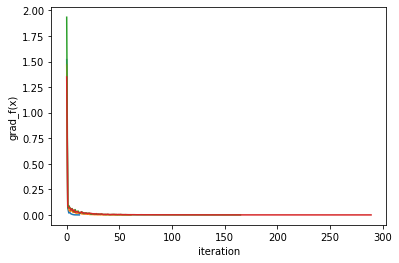

In [56]:
for i in range(4):
    plt.xlabel('iteration')
    plt.ylabel('grad_f(x)')
    plt.plot(sgd_data[i][2])
plt.show()

In [57]:
for i in range(4):
    print("SGD num of it:", sgd_data[i][0], ",mu=", MU[i])

SGD num of it: 13 ,mu= 0.5833333333333333
SGD num of it: 62 ,mu= 0.053030303030303025
SGD num of it: 166 ,mu= 0.005255255255255255
SGD num of it: 290 ,mu= 0.000525052505250525
